<a href="https://colab.research.google.com/github/Ijusttyped/HPI_Python_Workshop/blob/main/HPI_Programming_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizing the latest COVID numbers with python**

In this day of the workshop we want to enhance our skills on handling different datatypes in python and how to display them in an appropriate way.

After finishing todays workshop you will be able to:

* load data from a publicly available endpoint
* handle and transform different datatypes
* visualize numbers into fancy graphs


For our example we will be working with data from the RKI for the latest numbers on corona diseases.

**A short notice on the environment you are working in today:**

"Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education."

That means Google provides us a python installation with the most common packages. We can execute python code through the web interface you see now in your browser.
**To execute a line of code hit shift and enter.**

### 1. Loading data

To get our desired data, we will be using an API endpoint which is publicly available. 

If you don't know what an endpoint is, all good. Take some time and make yourself familiar with it. ([Wikipedia](https://en.wikipedia.org/wiki/Web_API))

Now that you are familiar with the terminology, we can get the address of the endpoint from the following website: [RKI COVID19](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/geoservice)

Click on the "+" Button to add a new filter. In the Attributes pane choose `Bundesland | Text` in the free text field type `Berlin`.

Your screen should now look like this:

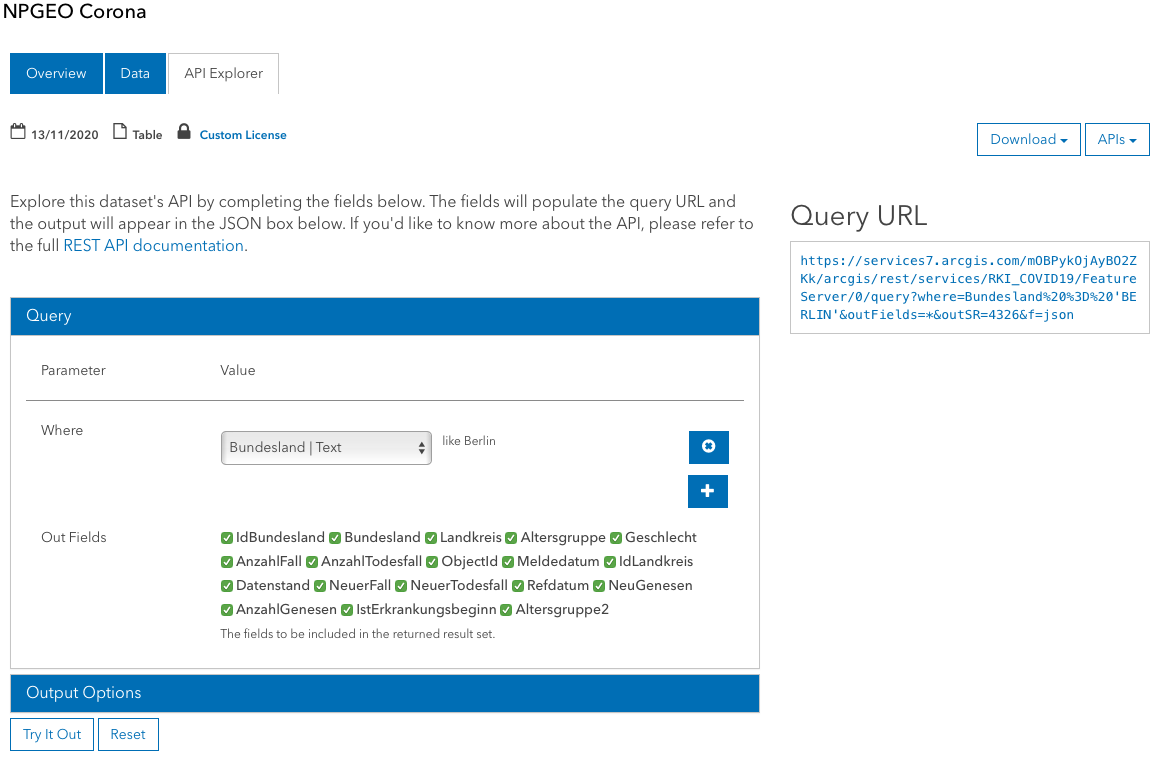

**Task 1:** Save the link you see in the `Query URL` box as a string in a variable named `url`

Python is community based language and very well known for its variety of packages that are available. A python package is software written by people from and for the python community. It provides additional functionality and can be used for free.

To now load our data with python we are going to use a package called [requests: HTTP for Humans](https://requests.readthedocs.io/en/master/).

To use packages in your code, they first need to be imported. This can be easily done by typing `import` followed by the name of the package.

For example:

```python
import supercoolpackage
```

Since google provides us already the most common packages here, there is no need of installing the package. If you are working on your local computer you might have to install the package, for example via `pip install ...`

**Task 2:** Import the package named `requests` so that it can be used going forward

Now that the package is imported, we can utilize its functionality. The following cell is retreiving data from the url specified in Task 1 and storing the results in a variable named `data`.

In [ ]:
response = requests.get(url)
data = response.json()

### 2. Transforming data

Now that we have the data stored in our variable `data` we want to transform the data into a format which is suitable for making visualizations.

**Task 3:** Identify the datatype of the variable `data` ([hint](https://docs.python.org/3/library/functions.html#type))

Now that you know what datatype we are working with take some time and make yourself familiar with it. A good source is always the [official python documentation](https://docs.python.org/3.8/tutorial/datastructures.html#dictionaries)

**Task 4:** Display all keys available in the dictionary `data` ([hint](https://docs.python.org/3.7/library/stdtypes.html#dict.keys))


You should now see something like this:

`dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'fields', 'exceededTransferLimit', 'features'])`

Showing you all the available keys in our dictionary. Let us dive a little bit deeper and now access the values of one of these.

**Task 5:**
1. Access the values of the `data` dictionary for the key `features`
2. Save the values to a new variable named `feature_list` and take a look at the output


Great, we actually found the number we want to display later on. We now want to understand a little bit better the structure of the `feature_list`. For that we can start by taking a look at the data type.

In [ ]:
type(feature_list)

Surprise, our feature list is of datatype list. If you are not familiar with lists, take some time to take a look at [the docs](https://docs.python.org/3/tutorial/datastructures.html)

Elements of a list can be accessed via the index of the element. Many programming languages like Java, JavaScript, C and many more start their index with a 0. This is by design of the language.
It means the first element of the list has index 0 and not index 1, which might be a little bit confusing at the beginning.

A short example: Let us take a look on following list

|||||
|-|-|-|-|
|list =| ["first element", | "second element", | "third element"]| 
|index |      0            |         1         |         2       |

Then `list[0]` would return us `"first element"` and `list[2]` would return `"third element"`.


**Task 6:** Access the first element of the list.

What datatype is this element?
Are the other elements are of the same datatype?

Let us quickly summarize what we got so far:

* Our variable `feature_list` is a list of elements
* Each element in the list is a dictionary
* The data we want to visualize is in each of these dictionaries with key `attributes`

The fact that `attributes` is another (and the only) key in each of our lists elements is not beneficial to visualize the numbers.

**The scope of the introduction into datatypes end here.**

The following tasks can be seen as an outlook. The solution is provided and you might want to take a look and try to understand what is happening.


**Task 7:**

Create a new list, where each element contains only a dictionary with our numbers. It should look like this:

```python
[
  {'Altersgruppe2': 'Nicht übermittelt',
  'AnzahlFall': 2,
  'AnzahlGenesen': 2,
  ...},
  {'Altersgruppe2': 'Nicht übermittelt',
  'AnzahlFall': 1,
  'AnzahlGenesen': 1,
  ...},
  ...
]
```
1. Create an empty list named `flat_feature_list`
2. Build a [for loop](https://wiki.python.org/moin/ForLoop) to iterate over each element in our variable `feature_list`
3. Within the loop, append the value of each elements `attributes` to the `flat_feature_list`



In [ ]:
flat_feature_list = []
for element in feature_list:
  flat_feature_list.append(element["attributes"])

A common datatype in python are dataframes. You can think of dataframes as tables, like you maybe know them from excel. The most popular python package for working with dataframes is [pandas](https://pandas.pydata.org/docs/user_guide/10min.html). Take some time and click through their documentation to get a first glimpse.

We will now use the package to create a dataframe from our covid data.

In [ ]:
import pandas as pd

In [ ]:
covid_data = pd.DataFrame(flat_feature_list)

**Task 8:** Display the first rows of the dataframe `covid_data` ([hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html))

In [ ]:
covid_data.head()

### 3. Visualizing data

Now that we have our gathered data in a handy table format, we can start building graphs to visualize the content.

When you think back to your math class, you should remember the coordinate system (Koordinatensystem) and that we need values for the x-axis and values for the y-axis.

Let us make an example.

In [ ]:
x = "Altersgruppe"
y = "AnzahlFall"

In [ ]:
covid_data.set_index(x)[[y]].plot(kind="bar")

Well, that doesn't look like a visualization which tells us something meaningful.

**Task 9:** Take a closer look at the table format and try to understand why we see so many entries on the x-axis of the graph. ([hint](https://en.wikipedia.org/wiki/Wide_and_narrow_data))


Like you might have figured out, we have a table in narrow or long format. This format is showing a new row for each new covid registration that is made. For a first visualization on a higher level, we rather want to see a summary like all new registrations in a specific age-group.

The following implementation creates a summary by aggregating the y-value based on the x-value and plots the result as a bar chart. Take some time and take a closer look at the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) functionality.
Heuristically you can think of "for each age-group in "Altersklasse" calculate the sum of the corresponding values in "AnzahlFall"."

**Task 10:**
1. Try different columns on the x and y axis, what can you explore?
2. Try to change the column of the bars
3. Try to add a title to the plot
4. Try to make the picture bigger
5. Try a different measure than sum (e.g. mean)

[help](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

In [ ]:
x = "Altersgruppe"
y = "AnzahlFall"
aggregated_data = covid_data.groupby(x)[y].sum()
aggregated_data.plot(kind="bar")